# MNIST dataset image classification

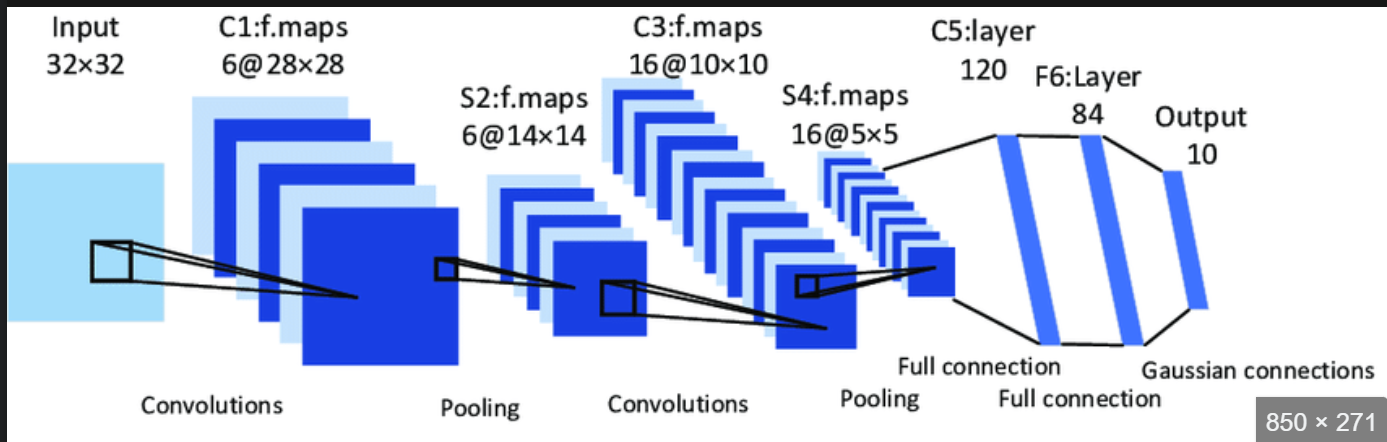

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Flatten
from keras import Sequential
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.utils import plot_model, to_categorical

!pip install np_utils
#from keras.utils import np_utils


!pip install visualkeras
import visualkeras


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import os, sys
import warnings
warnings.filterwarnings('ignore')

os.getcwd()



from keras.datasets import mnist

In [ ]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Preprocessing

In [ ]:
# Preprocessing step - feature scaling
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train=x_train.reshape(x_train.shape[0], 28,28,1)
x_test=x_test.reshape(x_test.shape[0], 28,28,1)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [ ]:
y_train= to_categorical(y_train, 10)
y_test= to_categorical(y_test, 10)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


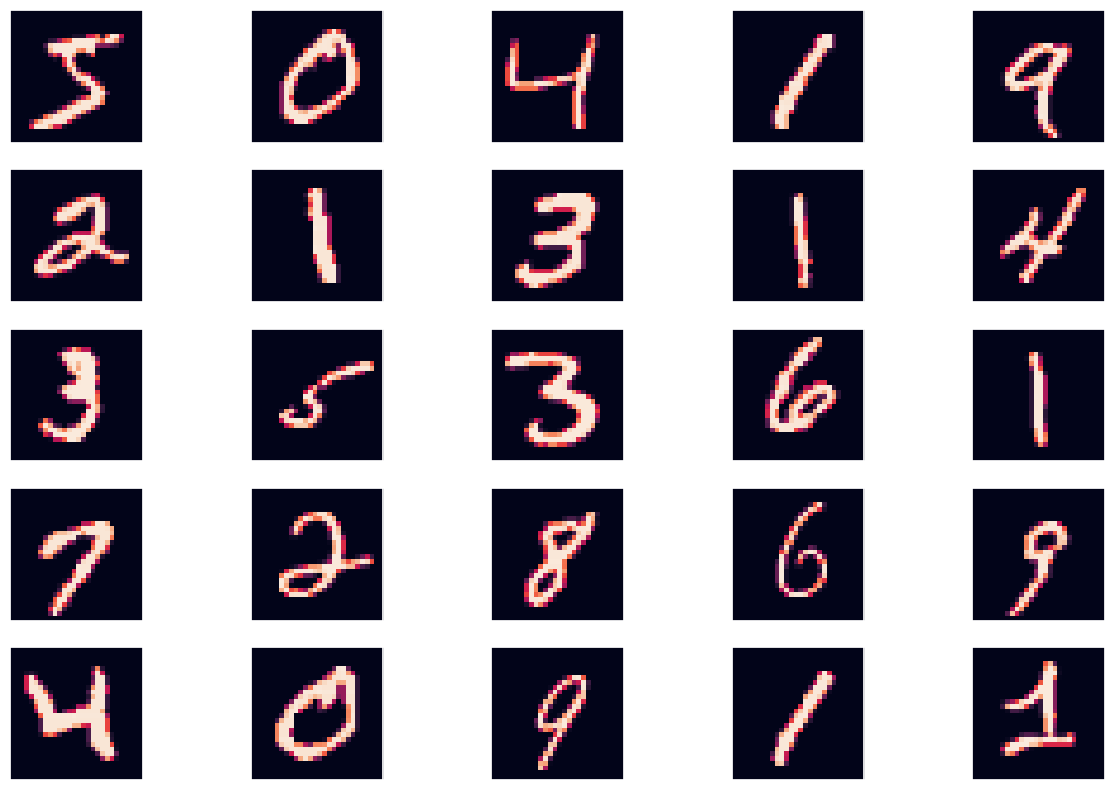

In [ ]:
plt.figure(figsize=(15,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
plt.show()

#Building LeNet5 Model

In [ ]:
from keras.layers import MaxPooling2D, AveragePooling2D

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

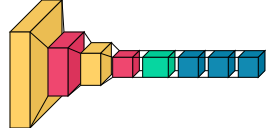

In [ ]:
model=Sequential()

#Convolutional LAyer 1
model.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), padding='valid', activation='tanh', input_shape=(28,28,1)))
#28-5+1> 24*24
#((n-k+2p)/s )+1
# trainable params at layer conv1 are dependent on filter size and # of filter >>>(5*5 + 1 bais) * 6 filters >>156

#Average Pooling LAyer 1
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2), padding='valid'))
#input is 24*24 , filter is 2*2 ad stride is 2 >> (24-2/2 ) + 1 >> 12*12 > non trainable parameters


#Convolutional LAyer 2
model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='tanh'))
#input is 12*12 ,
#filetr is 5*5*6(previous pooling layer o/p), stride is 1 and padding is 0
# 12-5+1 >>8*8
# params >(5*5*6)+ 1) *16 >151*16  > 2416 params

#Average Pooling LAyer 2
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2), padding='valid'))
# input size 8*8
# (8-2/2 )+1 >>>>>>>4*4

##Deep Neural Network

model.add(Flatten())  # 4*4*16>256
model.add(Dense(120, activation='tanh')) # 256*120+120 >>> 30840
model.add(Dense(84, activation='tanh')) # 128*84+84 >>>> 10386

#output layer

model.add(Dense(10, activation='softmax'))

model.summary()
visualkeras.layered_view(model)


In [ ]:
model.compile(optimizer='adam' , loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history=model.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=128, epochs=10 )


Epoch 1/10
469/469 [==============================] - 43s 89ms/step - loss: 0.3634 - accuracy: 0.8956 - val_loss: 0.1512 - val_accuracy: 0.9560
Epoch 2/10
469/469 [==============================] - 29s 61ms/step - loss: 0.1303 - accuracy: 0.9606 - val_loss: 0.0952 - val_accuracy: 0.9712
Epoch 3/10
469/469 [==============================] - 25s 53ms/step - loss: 0.0840 - accuracy: 0.9741 - val_loss: 0.0708 - val_accuracy: 0.9779
Epoch 4/10
469/469 [==============================] - 25s 53ms/step - loss: 0.0626 - accuracy: 0.9807 - val_loss: 0.0581 - val_accuracy: 0.9824
Epoch 5/10
469/469 [==============================] - 26s 55ms/step - loss: 0.0510 - accuracy: 0.9841 - val_loss: 0.0540 - val_accuracy: 0.9834
Epoch 6/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0412 - accuracy: 0.9875 - val_loss: 0.0487 - val_accuracy: 0.9853
Epoch 7/10
469/469 [==============================] - 25s 53ms/step - loss: 0.0354 - accuracy: 0.9888 - val_loss: 0.0568 - val_accuracy:

In [ ]:
# Visualise the output

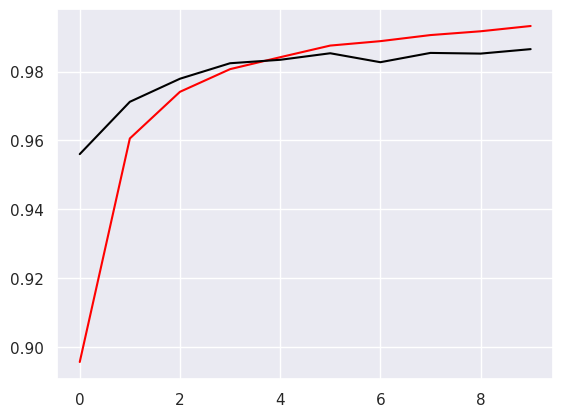

In [ ]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='black')


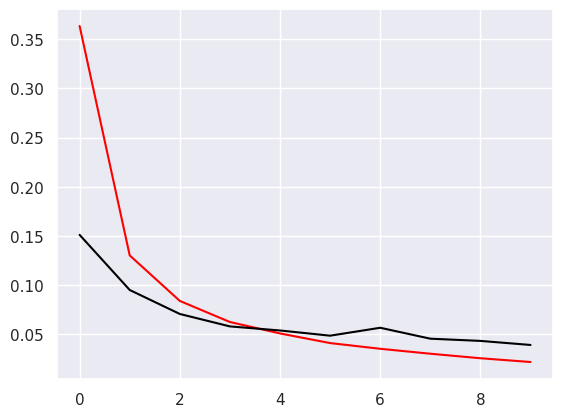

In [ ]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='black')
